# BLE Sniffer analysis

This notebook is used to analyze the BLE advertisements that we sniffed from.
Derived from `sniffer-2` which focused on # advertisements observed. This considers the duration observed for. 

In [1]:
from builtins import breakpoint
import multiprocessing as mp
import pandas.testing as pdt
from dateutil import parser
import os
import numpy as np
import pandas as pd
import threading
from tqdm import tqdm
import pdb
from sniffer import get_aggregates, parse_json, read_files
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import swifter


In [2]:
def get_time_stats(ndf):
    ndf["startTime"] = ndf.time.apply(lambda x:min(x))
    ndf["endTime"] = ndf.time.apply(lambda x:max(x))
    ndf["exposure_s"] = ndf['endTime'] - ndf['startTime']
    ndf["exposure_s"] = ndf.exposure_s.abs()
    return ndf


In [3]:
EXPOSURE = 900

No of unique MACs:10
03:b5:00:ed:fb:85, for a total of 472.6630001068115
68:6b:e8:bc:5a:8e, for a total of 472.8489999771118
5b:4d:9e:48:27:38, for a total of 494.59499979019165
56:72:f6:32:48:2d, for a total of 852.3829998970032
27:b2:0b:71:fa:36, for a total of 852.7090001106262
df:83:ab:92:b9:74, for a total of 491.36500000953674
de:a2:86:1e:46:a5, for a total of 0.0
ea:d0:bc:29:e0:97, for a total of 6.025000095367432
cc:e8:08:38:47:a9, for a total of 493.8609998226166
7d:37:d8:62:04:24, for a total of 663.6930000782013


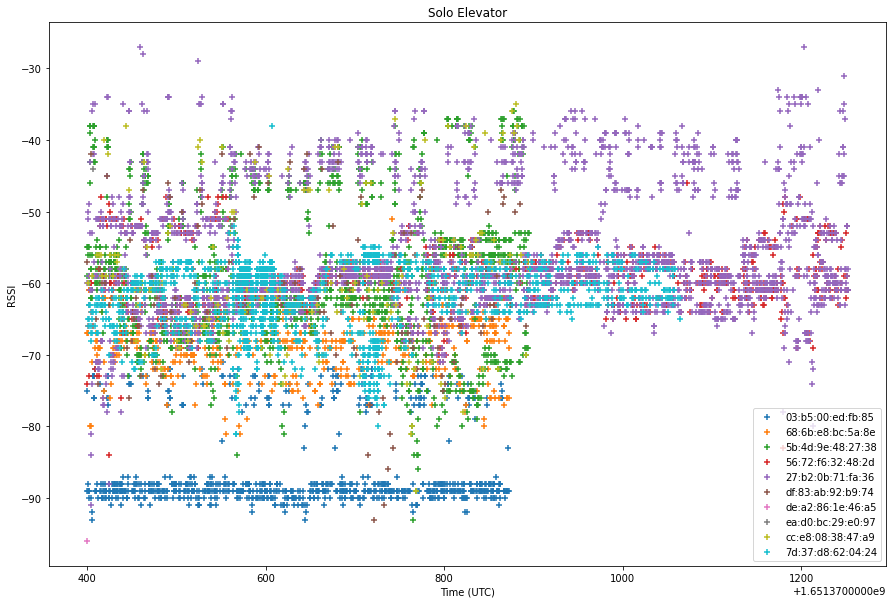

In [10]:
# A single log file from cory_elevator
plt.figure(figsize=(15, 10))
ndf = pd.read_pickle("pkls/solo-elevator.pkl")
ndf = get_time_stats(ndf)
ndf = ndf[(ndf.exposure_s <= EXPOSURE)]
ndf = ndf.sort_values(['startTime', 'exposure_s'])
ndf = ndf[:10]
print(f"No of unique MACs:{len(ndf)}")
for index, row in ndf.iterrows():
#     plt.scatter(row["time"], row["rssi"], label=row["mac"], marker='+')
    plt.scatter(row["time"], row["rssi"], label=row["mac"], marker='+')
    print(f"{row.mac}, for a total of {row.exposure_s}")
plt.xlabel("Time (UTC)")
plt.ylabel("RSSI")
plt.legend()
plt.title("Solo Elevator")
plt.show()

No of unique MACs:13262


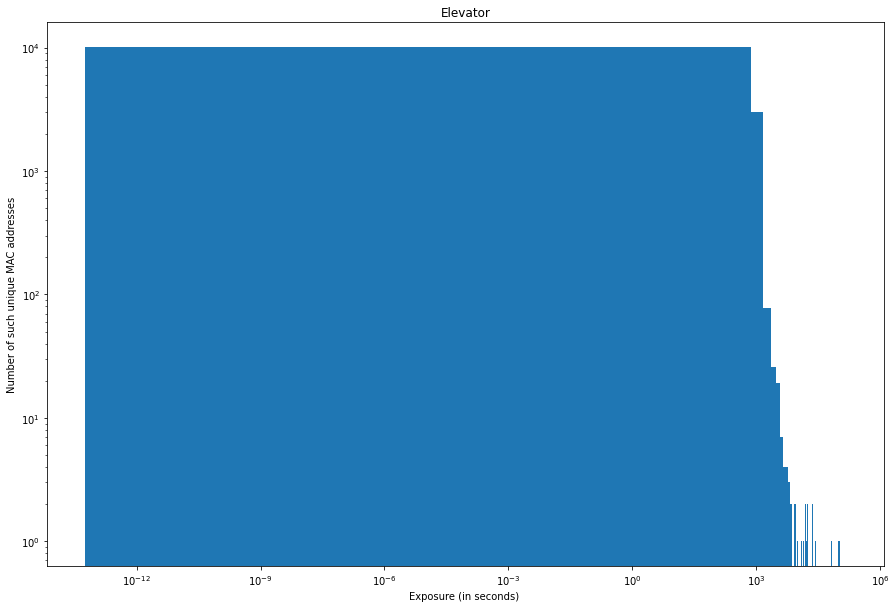

59:91:fe:6e:05:58, for a total of 330.3589999675751
64:7b:1e:8e:35:89, for a total of 445.45700001716614
27:da:88:12:8b:20, for a total of 19.259000062942505


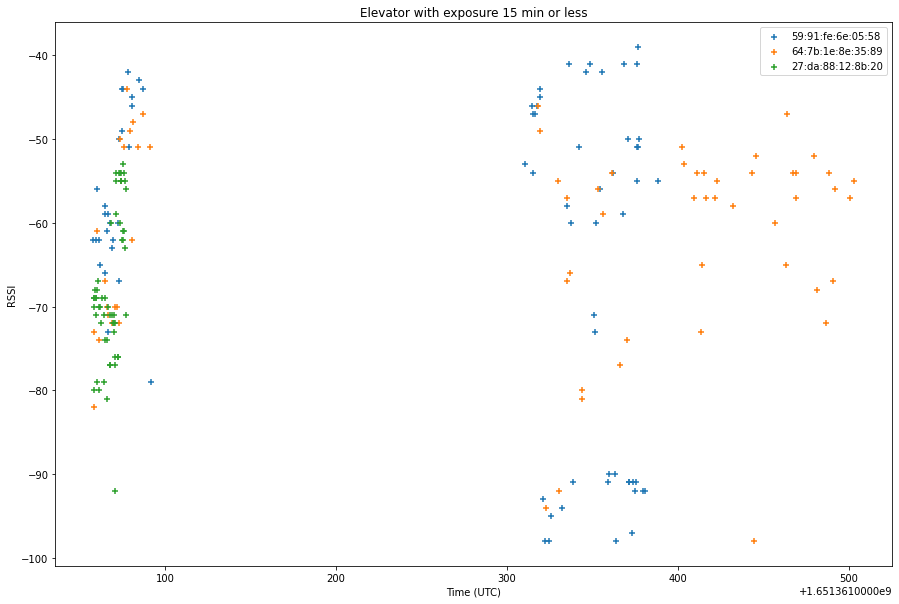

In [31]:
ndf = pd.read_pickle("pkls/elevator.pkl")
ndf = get_time_stats(ndf)
plt.figure(figsize=(15, 10))
plt.hist(ndf.exposure_s, bins=200)
# plt.ylim((0, 10**10))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Exposure (in seconds) ")
plt.ylabel("Number of such unique MAC addresses")
print(f"No of unique MACs:{len(ndf)}")
plt.title("Elevator")
plt.show()

ndf = ndf[ndf.exposure_s <= EXPOSURE]
ndf = ndf.sort_values(['startTime', 'exposure_s'])
ndf = ndf[4:7]
plt.figure(figsize=(15, 10))
for index, row in ndf.iterrows():
    plt.scatter(row["time"], row["rssi"], label=row["mac"], marker='+')
    print(f"{row.mac}, for a total of {row.exposure_s}")
plt.xlabel("Time (UTC)")
plt.ylabel("RSSI")
plt.legend()
plt.title("Elevator with exposure 15 min or less")
plt.show()

## 540AB Classroom

Reading 48 Data Files with 8871770.0 events

<Figure size 1080x720 with 0 Axes>

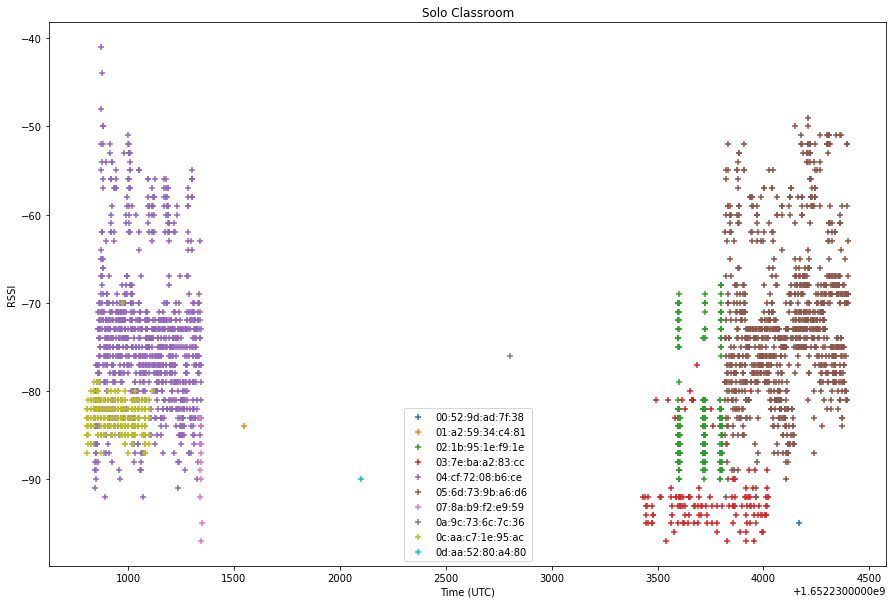

In [13]:
ndf = pd.read_pickle("pkls/solo-540ab.pkl")
ndf = get_time_stats(ndf)
plt.figure(figsize=(15, 10))
ndf = ndf.loc[ndf['exposure_s'] <= EXPOSURE]
ndf = ndf[:10]
plt.figure(figsize=(15, 10))
for index, row in ndf.iterrows():
    plt.scatter(row["time"], row["rssi"], label=row["mac"], marker='+')
plt.xlabel("Time (UTC)")
plt.ylabel("RSSI")
plt.legend()
plt.title("Solo Classroom")
plt.show()


No of unique MACs:12732


<Figure size 1080x720 with 0 Axes>

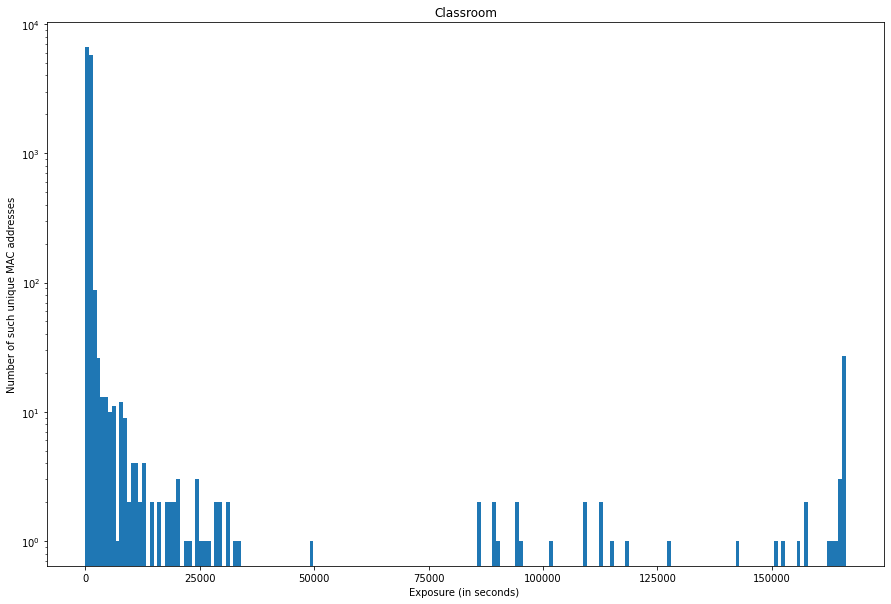

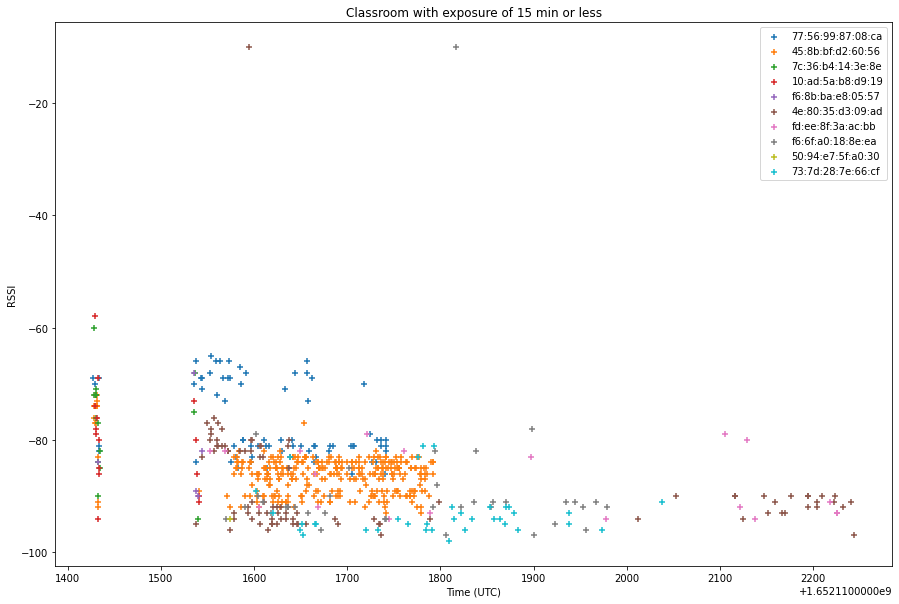

In [23]:
ndf = pd.read_pickle("pkls/540ab.pkl")
plt.figure(figsize=(15, 10))
ndf = get_time_stats(ndf)
plt.figure(figsize=(15, 10))
plt.hist(ndf.exposure_s, bins=200)
plt.yscale('log')
plt.xlabel("Exposure (in seconds) ")
plt.ylabel("Number of such unique MAC addresses")
print(f"No of unique MACs:{len(ndf)}")
plt.title("Classroom")
plt.show()
ndf = ndf.loc[ndf['exposure_s'] <= EXPOSURE]
ndf = ndf.sort_values(['startTime', 'exposure_s'])
ndf=ndf[0:10]
plt.figure(figsize=(15, 10))
for index, row in ndf.iterrows():
    plt.scatter(row["time"], row["rssi"], label=row["mac"], marker='+')
plt.xlabel("Time (UTC)")
plt.ylabel("RSSI")
plt.legend()
plt.title("Classroom with exposure of 15 min or less")
plt.show()

# Notes

1. Filter based on duration of visibility
2. Get different location [Done]
3. Filter based on manufacturer for phones - MAC look-ups, https://pypi.org/project/mac-vendor-lookup/
4. Make axis readable